# BLACK JACK

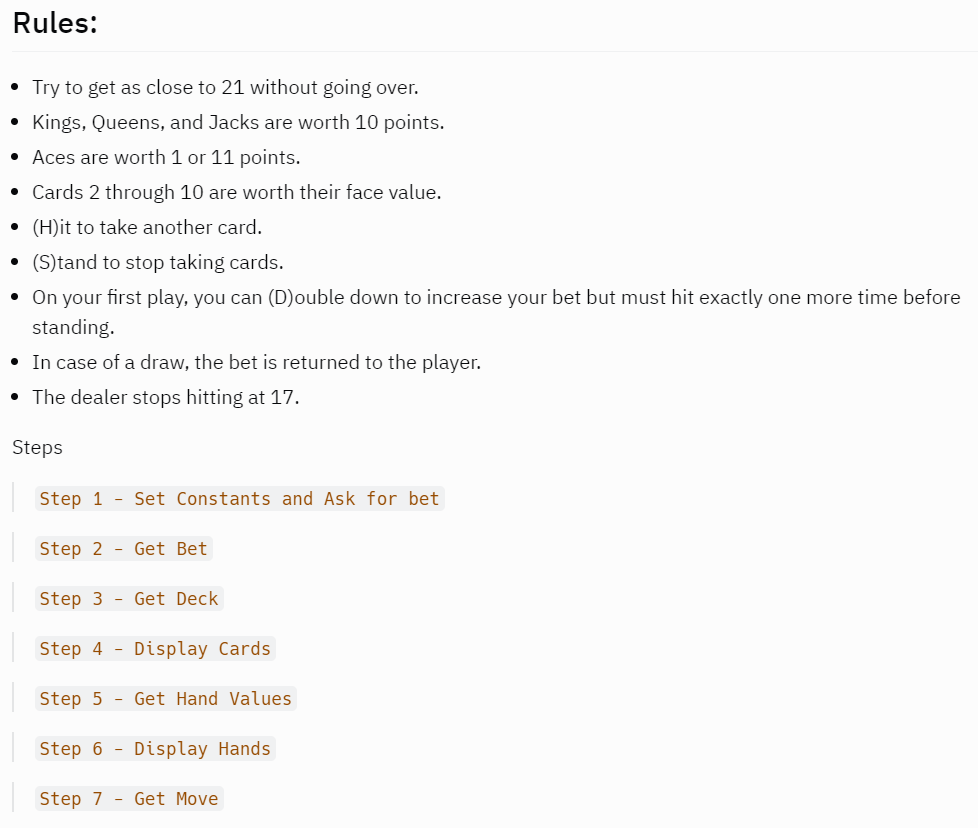

#### Step 1 - Set constants

In [2]:
Hearts   = chr(9829)      # character is '♥'
Diamonds = chr(9830)      # character is '♦'
Spades   = chr(9824)      # character is '♠'
Clubs    = chr(9827)      # character is '♣' 
Backside = 'backside'

In [3]:
print('Welcome to BlackJack')

Welcome to BlackJack


In [4]:
money = 5000
import sys
import random

#### Step 2 - Get Bet Function

In [5]:
def getBet(maxBet):
    """
    Ask the player how much money they want to bet for this round.
    """
    while True:
        print(f'How much do you bet? (1 - {maxBet}, or QUIT)')
        bet = input('> ').upper().strip()
        if bet == 'QUIT':
            print('Thanks for playing')
            sys.exit()
        if not bet.isdecimal():
            continue
        bet = int(bet)
        if 1 <= bet <= maxBet:
            return bet

#### Step 3 - Get Deck 

In [6]:
def getDeck():
    """Return a list of tuples (rank, suit) for all 52 cards"""
    deck = []
    for suit in (Hearts, Diamonds, Spades, Clubs):
        for rank in range(2, 11):
            # add the numbered cards
            deck.append((str(rank), rank))
        for rank in ('J', 'Q', 'K', "A"):
            # add face and ace cards
            deck.append((rank, suit))
    random.shuffle(deck)
    return deck

#### Step 4 - Display Cards

In [7]:
def displayCards(cards):
    """Display all the cards in the card list"""
    rows = ['', '', '', '', '']
    for card in cards:
        rows[0] += " ___  "
        if card ==  Backside:
            rows[1] += '|## | '
            rows[2] += '|###| '
            rows[3] += '|_##| '
        else:
            rank, suit = card
            rows[1] += '|{} | '.format(rank.ljust(2))
            rows[2] += '| {} | '.format(suit)
            rows[3] += '|_{}| '.format(rank.rjust(2, "_"))
    for row in rows:
        print(row)

#### Step 5 - Get Hand Values

In [8]:
def getHandValues(cards):
    """Return value of cards."""
    value = 0
    number_of_aces = 0
    # Add the value for non ace cards.
    for card in cards:
        rank = card[0]
        if rank == 'A':
            number_of_aces += 1
        elif rank in ('K', 'J', 'Q'):
            value += 10
        else:
            value += int(rank)
    value += number_of_aces
    for i in range(number_of_aces):
        # If another 10 can be added without busting
        if value + 10 <= 21:
            value += 10
    return value

#### Step 6 - Display Hands

In [9]:
def displayHands(player_hand, dealer_hand, show_dealer_hand):
    """
    Show player's and dealer's hand
    """
    print()
    if show_dealer_hand:
        print('DEALER: ',getHandValues(dealer_hand))
        displayCards(dealer_hand)
    else:
        print('DEALER: ???')
        displayCards([Backside] + dealer_hand[1:])
    # Show the player cards
    print('PLAYER:', getHandValues(player_hand))
    displayCards(player_hand)

#### Step 7 - Get Move

In [10]:
def getMove(player_hand, money):
    """
    Ask the player for their move, return H, S or D
    """
    while True:
        # Determine what move the player can make
        moves = ["(H)it", "(S)tand"]
        if len(player_hand) == 2 and money > 0:
            moves.append('(D)ouble down')
        # Ask from player the move, by showing options
        move_prompt = ", ".join(moves) + ">"
        move = input(move_prompt).upper()
        if move in ("H", "S"):
            return move
        if move == 'D' and '(D)ouble down'  in moves:
            return move 

### Main Program

In [11]:
while True:
    # Check if player has run out of money
    if money <= 0:
        print("It is good that you are not playing with real money.")
        print('Thanks for playing')
        sys.exit()
    # Ask player to enter their bet
    print('Money:', money)
    # Get bet
    bet = getBet(money)
    # Get deck 
    deck = getDeck()
    # Give the dealer and player two cards from the deck
    dealer_hand = [deck.pop(), deck.pop()]
    player_hand = [deck.pop(), deck.pop()]
    # Handle player actions
    print("Bet:", bet)
    while True:
        displayHands(player_hand, dealer_hand, False)
        print()
        # Check if player has bust
        if getHandValues(player_hand) > 21:
            break
        # Get player's move
        move = getMove(player_hand, money - bet)
        # Handle player moves
        if move == 'D':
            # Increase the bet
            additional_bet  = getBet(min(bet, (money-bet)))
            bet += additional_bet
            print(f'Bet increase to {bet}')
            print('Bet:', bet)
        if move in ("H", 'D'):
            # Get another card
            new_card = deck.pop()
            rank, suit = new_card
            print(f'You drew a {rank} of {suit}.')
            player_hand.append(new_card)
            # Check if player has bust
            if getHandValues(player_hand) > 21:
                continue
        if move == 'S':
            # Stop player's turn
            break
    # Handle dealer's actions
    if getHandValues(player_hand) <= 21:
        while getHandValues(dealer_hand) < 17:
            # The dealer hits
            print('The dealer hits..')
            dealer_hand.append(deck.pop())
            displayHands(player_hand, dealer_hand, False)
            if getHandValues(dealer_hand) > 21:
            # the dealer has busted 
                break
            input('Press enter to continue...')
            print('\n\n')
            
    displayHands(player_hand, dealer_hand, True)
    player_value = getHandValues(player_hand)
    dealer_value = getHandValues(dealer_hand)
    # Handle whether the player won, lost or draw
    if dealer_value > 21:
        print(f"Dealer busts! You win ${bet}")
        money += bet
    elif player_value > 21 or player_value < dealer_value:
        print('You lost!')
        money -= bet
    elif player_value > dealer_value:
        print(f"You win ${bet}!")
        money += bet
    else:
        print('It is a draw and the bet is returned to you!')
    input('Press enter to continue')
    print('\n\n')

Money: 5000
How much do you bet? (1 - 5000, or QUIT)


>  100


Bet: 100

DEALER: ???
 ___   ___  
|## | |9  | 
|###| | 9 | 
|_##| |__9| 

PLAYER: 12
 ___   ___  
|9  | |3  | 
| 9 | | 3 | 
|__9| |__3| 




(H)it, (S)tand, (D)ouble down> H


You drew a 4 of 4.

DEALER: ???
 ___   ___  
|## | |9  | 
|###| | 9 | 
|_##| |__9| 

PLAYER: 16
 ___   ___   ___  
|9  | |3  | |4  | 
| 9 | | 3 | | 4 | 
|__9| |__3| |__4| 




(H)it, (S)tand> H


You drew a 6 of 6.

DEALER: ???
 ___   ___  
|## | |9  | 
|###| | 9 | 
|_##| |__9| 

PLAYER: 22
 ___   ___   ___   ___  
|9  | |3  | |4  | |6  | 
| 9 | | 3 | | 4 | | 6 | 
|__9| |__3| |__4| |__6| 



DEALER:  19
 ___   ___  
|K  | |9  | 
| ♥ | | 9 | 
|__K| |__9| 

PLAYER: 22
 ___   ___   ___   ___  
|9  | |3  | |4  | |6  | 
| 9 | | 3 | | 4 | | 6 | 
|__9| |__3| |__4| |__6| 

You lost!


Press enter to continue N





Money: 4900
How much do you bet? (1 - 4900, or QUIT)


>  4900


Bet: 4900

DEALER: ???
 ___   ___  
|## | |K  | 
|###| | ♦ | 
|_##| |__K| 

PLAYER: 11
 ___   ___  
|6  | |5  | 
| 6 | | 5 | 
|__6| |__5| 




(H)it, (S)tand> H


You drew a 4 of 4.

DEALER: ???
 ___   ___  
|## | |K  | 
|###| | ♦ | 
|_##| |__K| 

PLAYER: 15
 ___   ___   ___  
|6  | |5  | |4  | 
| 6 | | 5 | | 4 | 
|__6| |__5| |__4| 




(H)it, (S)tand> H


You drew a 10 of 10.

DEALER: ???
 ___   ___  
|## | |K  | 
|###| | ♦ | 
|_##| |__K| 

PLAYER: 25
 ___   ___   ___   ___  
|6  | |5  | |4  | |10 | 
| 6 | | 5 | | 4 | | 10 | 
|__6| |__5| |__4| |_10| 



DEALER:  20
 ___   ___  
|K  | |K  | 
| ♣ | | ♦ | 
|__K| |__K| 

PLAYER: 25
 ___   ___   ___   ___  
|6  | |5  | |4  | |10 | 
| 6 | | 5 | | 4 | | 10 | 
|__6| |__5| |__4| |_10| 

You lost!


Press enter to continue 





It is good that you are not playing with real money.
Thanks for playing


SystemExit: 

C:\Users\vamsh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [102]:
deck = getDeck()

In [103]:
deck = deck[3:7]

In [104]:
displayCards(deck)

 ___   ___   ___   ___  
|5  | |8  | |A  | |A  | 
| 5 | | 8 | | ♥ | | ♦ | 
|__5| |__8| |__A| |__A| 



In [ ]:
print("Welcome to BlackJack")
money = Money(5000)
while True:
    # Check if player has run out of money
    if money.amount <= 0:
        print("It is good that you weren't playing with real money")
        print("Thanks for playing!")
        sys.exit()
    # Ask player to enter their bet
    print("Money: ", money.amount)
    bet = money.get_bet(money.amount)
    # get deck
    deck = Deck()
    deck.shuffle()
    # Give the dealer and player two cards from the deck
    player_hand = Hand()
    dealer_hand = Hand(dealer=True)
    for i in range(2):
        player_hand.add_card(deck.deal())
        dealer_hand.add_card(deck.deal())
    # Handle player actions
    print("Bet:", bet)
    while True:
        dealer_hand.display()
        player_hand.display()
        print()
        # Check if player has bust
        if player_hand.get_value() > 21:
            break
        # Get player's move
        game = Game()
        move = game.get_move(player_hand.get_value(), money.amount - bet)
        # Handle player moves
        if move == 'D':
            additional_bet = money.get_bet(min(bet, (money.amount-bet)))
            bet += additional_bet
            print(f"Bet increased to {bet}.")
            print("Bet:", bet)
        if move in ('H', 'D'):
            # Get another card
            new_card = deck.deal()
            rank = new_card.get_rank()
            suit = new_card.get_suit()
            print(f"You drew a {rank} of {suit}.")
            player_hand.add_card(new_card)
            if player_hand.get_value() > 21:
                continue
        if move == 'S':
            break
    # Handle dealer's actions
    if player_hand.get_value() <= 21:
        while dealer_hand.get_value() < 17:
            print("The dealer hits..")
            dealer_hand.add_card(deck.deal())
            dealer_hand.display()
            player_hand.display()
            if dealer_hand.get_value() > 21:
                break
            input("Press enter to continue..")
            print('\n\n')
    # Handle whether the player won, lost or draw
    dealer_hand.display(show_dealer=True)
    player_hand.display()
    player_value = player_hand.get_value()
    dealer_value = dealer_hand.get_value()
    if dealer_value > 21:
        print(f"Dealer busts! You win ${bet}!")
        money.add_money(bet)
    elif player_value > 21 or player_value < dealer_value:
        print("You lost!")
        money.sub_money(bet)
    elif player_value > dealer_value:
        print(f"You win ${bet}!")
        money.add_money(bet)
    elif player_value == dealer_value:
        print("It is a draw and the bet is returned to you!")
        input("Press enter to continue..")
        print('\n\n')
